<a href="https://colab.research.google.com/github/stefymojica/MACC/blob/main/Caso_de_Uso_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASO DE ESTUDIO 2:** PREDICCI√ìN DE LA CALIDAD DEL VINO
**Estudiantes:** Sara Castillejo Ditta - Stefany Mojica Melo

**Asignatura:** Aprendizaje de m√°quina

*Matem√°ticas Aplicadas y Ciencias de la Computaci√≥n*

*2025/2*

**Contenido del cuaderno:**

1. Comprensi√≥n del Problema y An√°lisis de Datos (EDA)

    1.1 *Creaci√≥n de la Variable Objetivo:*

    1.2 *Distribuci√≥n de Variables:*

    1.3 *Correlaci√≥n con la Calidad:*

2. Preprocesamiento y Preparaci√≥n de Datos

    2.1 *Escalado de Caracter√≠sticas:*
    
    2.2 *Divisi√≥n de Datos*

3. Modelado con √Årbol de Decisi√≥n

    3.1 *Interpretabilidad y Visualizaci√≥n:*
    
    3.2 *Sobreajuste (Overfitting):*
    
    3.3 *Importancia de Caracter√≠sticas:*

4. Modelado con Naive Bayes
    
    4.1 *El Supuesto ‚ÄùNaive‚Äù (Ingenuo):*
    
    4.2 *Probabilidades a Posteriori:*
    
    4.3 *Manejo de Datos Continuos:*

5. Evaluaci√≥n comparativa y conclusiones

    5.1 *M√©tricas de Rendimiento:*
    
    5.2 *An√°lisis de Errores:*
    
    5.3 *Curva ROC y AUC:*

    5.4 *Recomendaci√≥n Final:*




##**1. Comprensi√≥n del Problema y An√°lisis de Datos (EDA)**

In [1]:
pip install ucimlrepo --q

In [35]:
# Importar librer√≠as
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#  ---------- Cargar datos -------------
wine_quality = fetch_ucirepo(id=186)

# Convertir a Dataframes
X = wine_quality.data.features
y = wine_quality.data.targets

# Unificar para el EDA
df_wine = pd.concat([X, y], axis=1)

# Mostrar la informaci√≥n b√°sica de los datos cargados
print("--- Descripci√≥n general de los datos ---")
print(df_wine.info())

# Mostrar los primeros registros
print("--- Primeros 5 registros ---")
df_wine.head()

--- Descripci√≥n general de los datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB
None
--- Primeros 5 registros ---


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
pd.unique(df_wine['quality'])

array([5, 6, 7, 4, 8, 3, 9])

###**1.1 Creaci√≥n de la Variable Objetivo:**
Cree la nueva variable objetivo binaria (alta calidad). Un vino con quality
‚â• 7 ser√° etiquetado como 1 (alta calidad) y los dem√°s como 0 (calidad est√°ndar). Cuantifique el desbalance de clases en esta nueva variable. ¬øQu√© implicaciones tiene este desbalance?

Distribuci√≥n de Clases (Diagn√≥stico)
alta_calidad
0    5220
1    1277
Name: count, dtype: int64

Probabilidades a Priori
alta_calidad
0    0.803448
1    0.196552
Name: proportion, dtype: float64


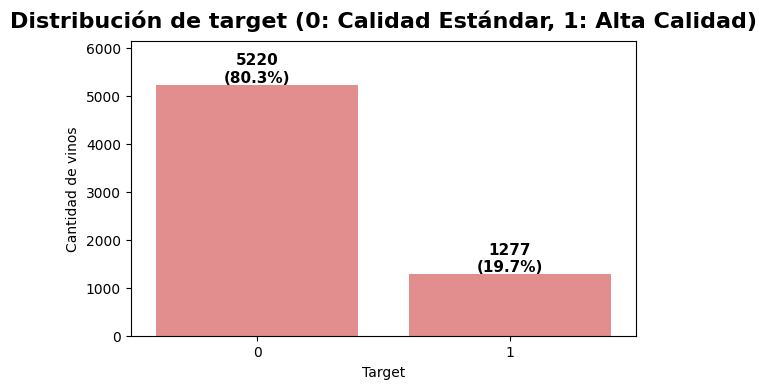


Estad√≠sticas Descriptivas de las Caracter√≠sticas (X)


count        mean        std      min       25%  \
fixed_acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile_acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric_acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual_sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free_sulfur_dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total_sulfur_dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   
alta_calidad          6497.0    0.196552   0.397421  0.00000   0.00000   

                            50%        75%        max  
fixed_acidity           7.00000    7.70000   15.90000  
volatile_acidity        0.29000    0.40000    1.58000  
citric_acid             0.31000    0.39000    1.66000  
residual_sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free_sulfur_dioxide    29.00000   41.00000  289.00000  
total_sulfur_dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000  
alta_calidad            0.00000    0.00000    1.00000

In [5]:
#  ---------- Variable objetivo y su distribuci√≥n -------------

# Crear la variable objetivo binaria
df_wine['alta_calidad'] = (df_wine['quality'] >= 7).astype(int)

# Verificar la distribuci√≥n de la nueva variable
print("Distribuci√≥n de Clases (Diagn√≥stico)")
print("=" * 50)
print(df_wine['alta_calidad'].value_counts())
print("\nProbabilidades a Priori")
print("=" * 50)
print(df_wine['alta_calidad'].value_counts(normalize=True))

# Visualizar la distribuci√≥n de clases
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='alta_calidad', data=df_wine, color='lightcoral')

# Agregar porcentajes sobre las barras
total = len(df_wine)
for p in ax.patches:
    altura = p.get_height()
    porcentaje = f'{100 * altura/total:.1f}%'
    ax.text(p.get_x() + p.get_width()/2., altura,
            f'{int(altura)}\n({porcentaje})',
            ha='center', va='bottom', fontsize=11, fontweight='bold')
# Aumentar l√≠mite Y
ax.set_ylim(0, ax.get_ylim()[1] * 1.12)

plt.title('Distribuci√≥n de target (0: Calidad Est√°ndar, 1: Alta Calidad)', fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('Target')
plt.ylabel('Cantidad de vinos')
plt.tight_layout()  # Ajusta autom√°ticamente los m√°rgenes
plt.show()

# Obtener estad√≠sticas descriptivas de las caracter√≠sticas num√©ricas
print("\nEstad√≠sticas Descriptivas de las Caracter√≠sticas (X)") # ¬øse refiere sin variable target?
print("=" * 50)
display(df_wine.describe().T) # Usamos .T para transponer la tabla y que sea m√°s f√°cil de leer

**Respuesta:** La clase de alta calidad es minoritaria (solo el 19.66% del dataset), lo que genera un fuerte desbalance que puede llevar a los modelos a centrarse en la clase negativa (baja calidad), fallando en reconocer vinos realmente buenos.

###**1.2 Distribuci√≥n de Variables:**
Visualice la distribuci√≥n de al menos tres variables predictoras (ej. alcohol, volatile acidity, sulphates) usando histogramas o diagramas de densidad. ¬øSiguen una distribuci√≥n normal (gaussiana)?
¬øPor qu√© es relevante esta observaci√≥n para el modelo Naive Bayes?

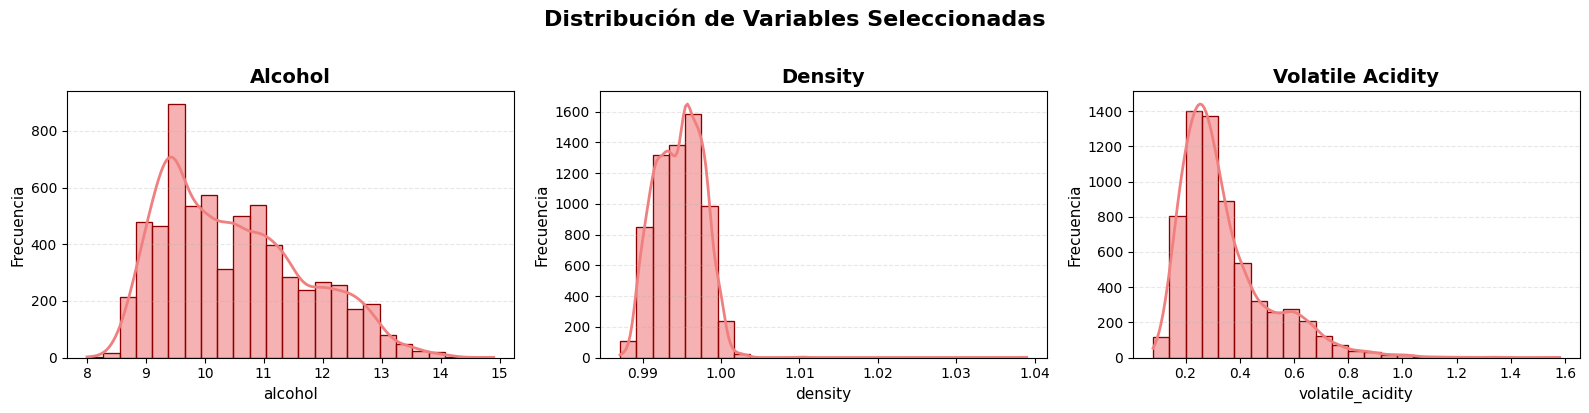

In [6]:
#  ---------- Distribuci√≥n de variables -------------

# Selecci√≥n de tres (3) variables
df_distr_wine = ['alcohol', 'density', 'volatile_acidity']

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for i, variable in enumerate(df_distr_wine):
    # Histograma
    sns.histplot(data=df_wine, x=variable, kde=True, ax=axes[i],
                 color='lightcoral', edgecolor='darkred',
                 bins=25, alpha=0.6, line_kws={'linewidth': 2})

    # Personalizaci√≥n
    axes[i].set_title(f'{variable.replace("_", " ").title()}',
                     fontsize=14, fontweight='bold')
    axes[i].set_xlabel(variable, fontsize=11)
    axes[i].set_ylabel('Frecuencia', fontsize=11)
    axes[i].grid(axis='y', alpha=0.3, linestyle='--')

plt.suptitle('Distribuci√≥n de Variables Seleccionadas',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

**Respuesta:** Las distribuciones no son normales, la de Alcohol y la de Volatile Acidity est√°n sesgadas a la izquierda con una cola larga a la derecha. La distribuci√≥n de Density s√≠ se ve como una campana en sus extremos, pero tambi√©n est√° un poco sesgada, esta vez a a derecha y tiene unos datos at√≠picos que tambi√©n alargan su cola derecha.

Estas distribuciones son una alerta para modelar con Naive Bayes, ya que este algoritmo asume normalidad en las variables cont√≠nuas. Lo ideal ser√≠a discretizarlas (llevandolas a categor√≠as).

###**1.3 Correlaci√≥n con la Calidad:**
Calcule la correlaci√≥n de todas las variables predictoras con la variable quality original.
¬øQu√© caracter√≠sticas parecen ser m√°s importantes para determinar la calidad del vino? ¬øCoincide esto con la intuici√≥n general sobre vinos?

Correlaciones con 'quality':
alcohol             :  0.4443
citric_acid         :  0.0855
free_sulfur_dioxide :  0.0555
sulphates           :  0.0385
pH                  :  0.0195
residual_sugar      : -0.0370
total_sulfur_dioxide: -0.0414
fixed_acidity       : -0.0767
chlorides           : -0.2007
volatile_acidity    : -0.2657
density             : -0.3059


Boxplots por clases de 'alta_calidad':


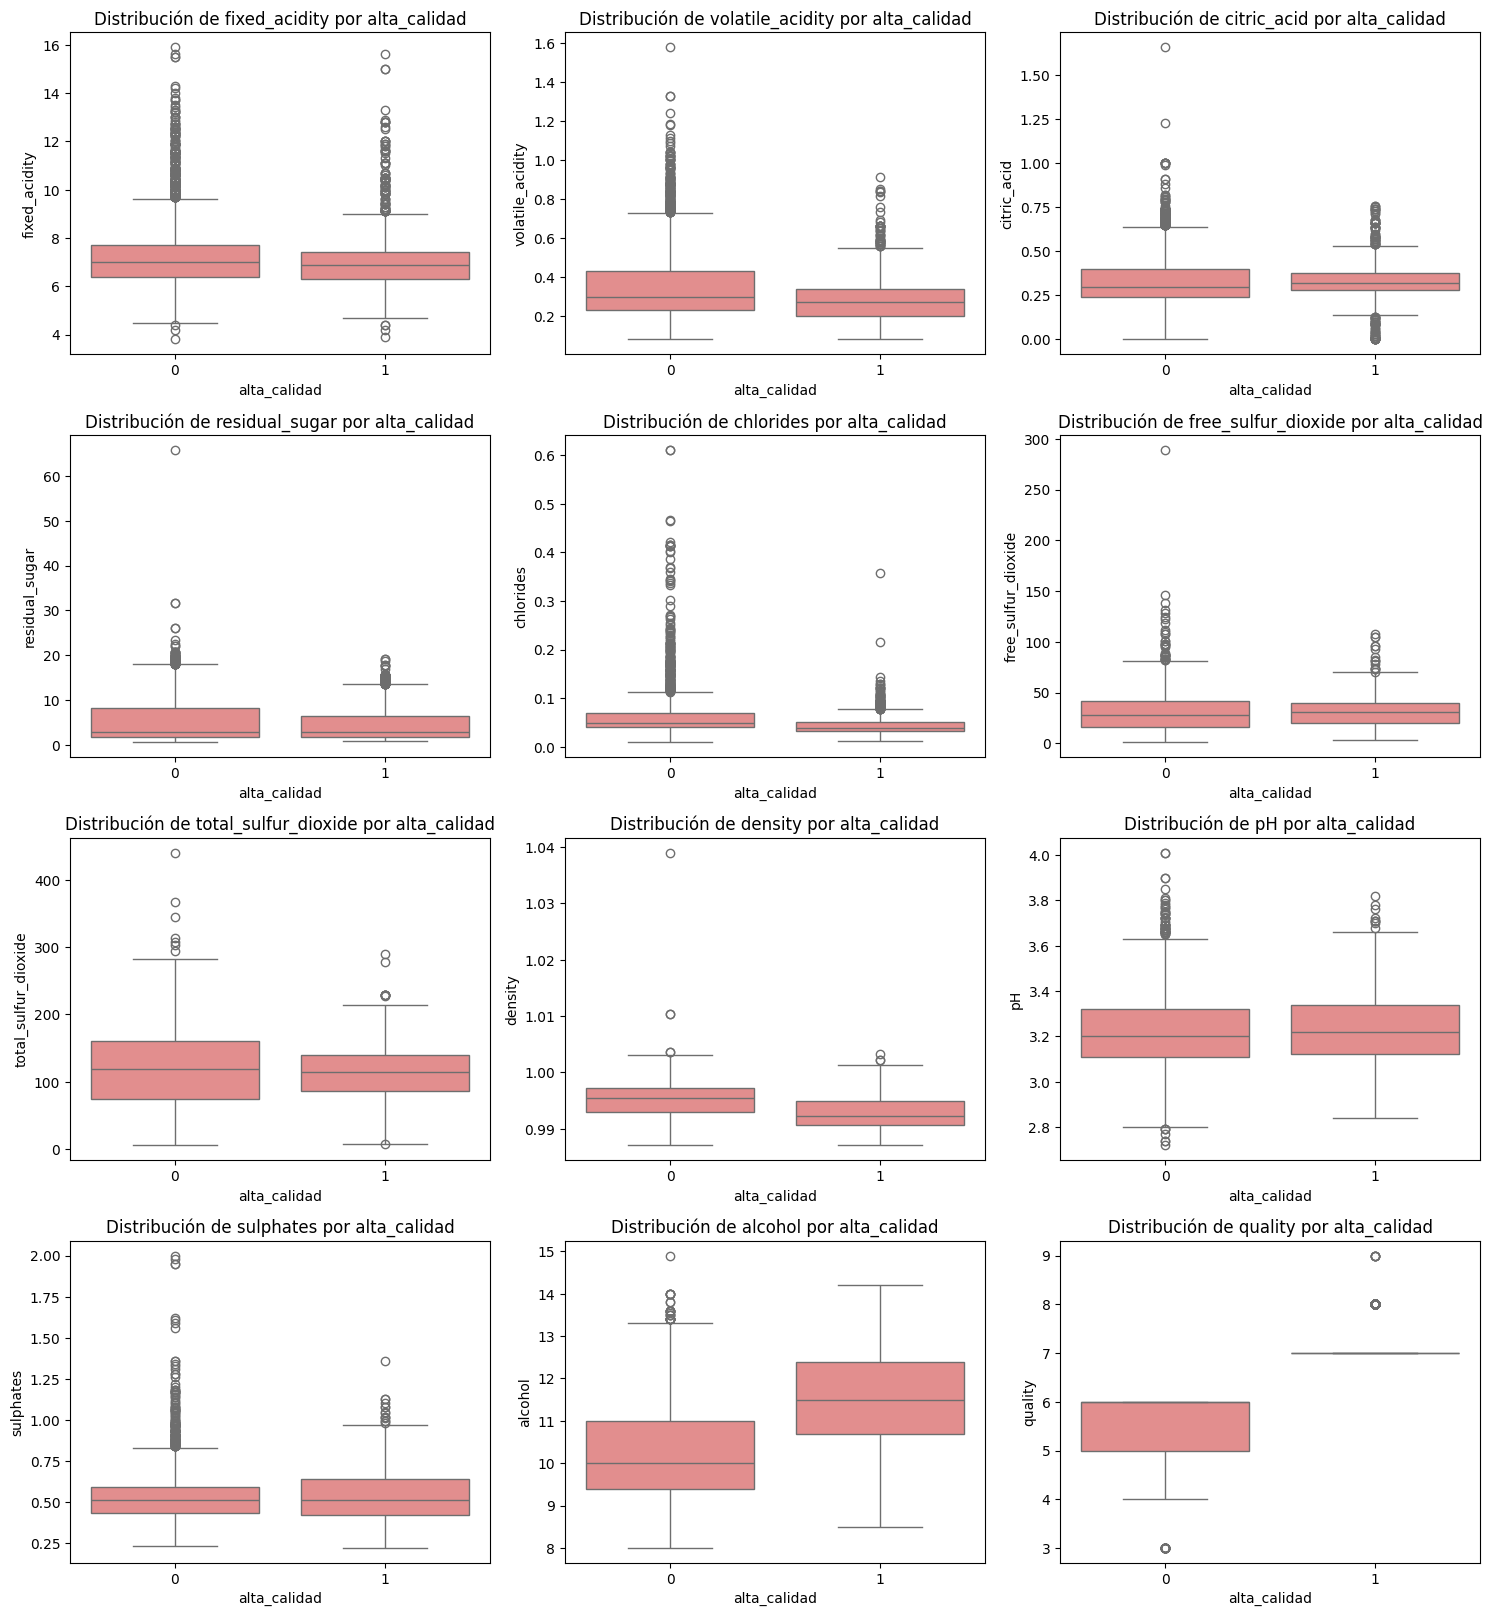

In [7]:
#  ---------- Correlaciones con la variable orginal -------------

# Calcular la correlaci√≥n de todas las variables con 'quality'
df_cor_wine = df_wine.corr()['quality'].sort_values(ascending=False)

# Mostrar las correlaciones (sin quality ni alta_calidad)
print("Correlaciones con 'quality':")
print("=" * 50)
for variable, correlacion in df_cor_wine.drop('quality').items():
    if variable != 'alta_calidad':  # Excluir la variable que acabamos de crear
        print(f"{variable:20s}: {correlacion:7.4f}") # Texto con 20 caracteres y n√∫meros con 4 decimales

#  ---------- Boxblots de caracter√≠sticas por clase de la nueva variable -------------

# Graficar boxplots para comparar distribuciones
print("\n\nBoxplots por clases de 'alta_calidad':")
print("=" * 50)
features_to_plot = df_wine.columns[:-1].tolist()

plt.figure(figsize=(15, 40))
for i, feature in enumerate(features_to_plot):
  if feature != 'alta_calidad':
    plt.subplot(10, 3, i + 1)
    sns.boxplot(x='alta_calidad', y=feature, data=df_wine, color='lightcoral')
    plt.title(f'Distribuci√≥n de {feature} por alta_calidad')

plt.tight_layout()
plt.show()

**Respuesta:** lalala

##**2. Preprocesamiento y Preparaci√≥n de Datos**

###**2.1 Escalado de Caracter√≠sticas:**
Los √Årboles de Decisi√≥n son inmunes al escalado de caracter√≠sticas, pero muchos otros algoritmos no lo son. Explique por qu√© el escalado (ej. StandardScaler) es un paso recomendado antes de entrenar un modelo como Gaussian Naive Bayes.

**Respuesta:** El escalado es esencial en Gaussian Naive Bayes porque su funci√≥n de probabilidad se basa en medias y desviaciones est√°ndar que pueden verse afectadas por variables con escalas distintas, al contrario de los arboles de decision donde toman decisiones por comparaciones y no se basan en calculos en magnitudes numericas.

###**2.2 Divisi√≥n de Datos:**
Divida el conjunto de datos en un 80% para entrenamiento y un 20% para prueba. Justifique la importancia de usar un random state en la divisi√≥n para asegurar la reproducibilidad de sus resultados.

**Respuesta:** La division de los datos permite que el modelo no aprenda a memorizar la informaci√≥n sino que aprenda los patrones generales de los datos, as√≠ se le estaria pasando informaci√≥n nueva al modelo con la cual se hacen validaciones.

In [8]:
X = df_wine.drop(columns=['quality','alta_calidad'], axis=1)
y = df_wine['alta_calidad']
#X.head()

In [9]:
#  ---------- Divisi√≥n de datos -------------

# --- 2. Divisi√≥n en Conjuntos de Entrenamiento y Prueba ---
# Usamos X (caracter√≠sticas originales) e y_encoded (objetivo num√©rico)
# test_size=0.2 significa que el 20% de los datos se usar√° para la prueba
# random_state=42 asegura que la divisi√≥n sea siempre la misma, para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verificamos las dimensiones de los conjuntos resultantes
print("\n--- Dimensiones de los Conjuntos de Datos ---")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_test: {y_test.shape}")


--- Dimensiones de los Conjuntos de Datos ---
Forma de X_train: (5197, 11)
Forma de X_test: (1300, 11)
Forma de y_train: (5197,)
Forma de y_test: (1300,)


In [10]:
#  ---------- Estandarizaci√≥n para Gaussean Naive -------------

# 1. Instanciar el escalador
scaler = StandardScaler()

# 2. Ajustar el escalador S√ìLO con los datos de entrenamiento y transformarlos
# El m√©todo .fit() calcula la media y la desviaci√≥n est√°ndar de X_train
# El m√©todo .transform() aplica la f√≥rmula de estandarizaci√≥n
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transformar los datos de prueba usando el MISMO escalador (ya ajustado)
X_test_scaled = scaler.transform(X_test)

# Convertimos los resultados (que son arrays de NumPy) de nuevo a DataFrames para verlos mejor
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

#print("--- Primeras 5 filas de los datos de entrenamiento SIN escalar ---")
#display(X_train.head())

print("\n--- Primeras 5 filas de los datos de entrenamiento ESCALADOS ---")
display(X_train_scaled_df.head())


--- Primeras 5 filas de los datos de entrenamiento ESCALADOS ---


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.468229         -0.599512     0.205467        0.464612  -0.712801   
1       0.851500         -0.352849     1.104063       -0.702999   1.067470   
2       0.385713          2.329612    -2.144710       -0.702999   0.234762   
3      -1.555065          0.202143     0.067221       -0.890650  -0.798944   
4      -0.468229         -0.476180     1.657046        2.070076  -0.081092   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.311659              0.343566 -0.296146 -0.168884  -1.083266   
1            -1.408735             -1.847518 -0.203072  0.269679   0.598577   
2             0.024927             -1.295294 -0.326062  1.209455   0.262208   
3            -1.007309             -0.618374 -1.492810  0.958848  -1.015992   
4             0.082273              0.450448  1.133204 -0.670098  -0.275981   

    alcohol  
0  0.013766  
1  1.608717  
2  1.105048  
3  1.021103  
4 -0.993572

##**3. Modelado con √Årbol de Decisi√≥n**

###**3.1 Interpretabilidad y Visualizaci√≥n:**

Entrene un √Årbol de Decisi√≥n con una profundidad m√°xima (max depth) de 3.
Visualice el √°rbol resultante. Interprete una de las rutas desde el nodo ra√≠z hasta una hoja. ¬øQu√© reglas ha aprendido el modelo para clasificar un vino como de "alta calidad"?


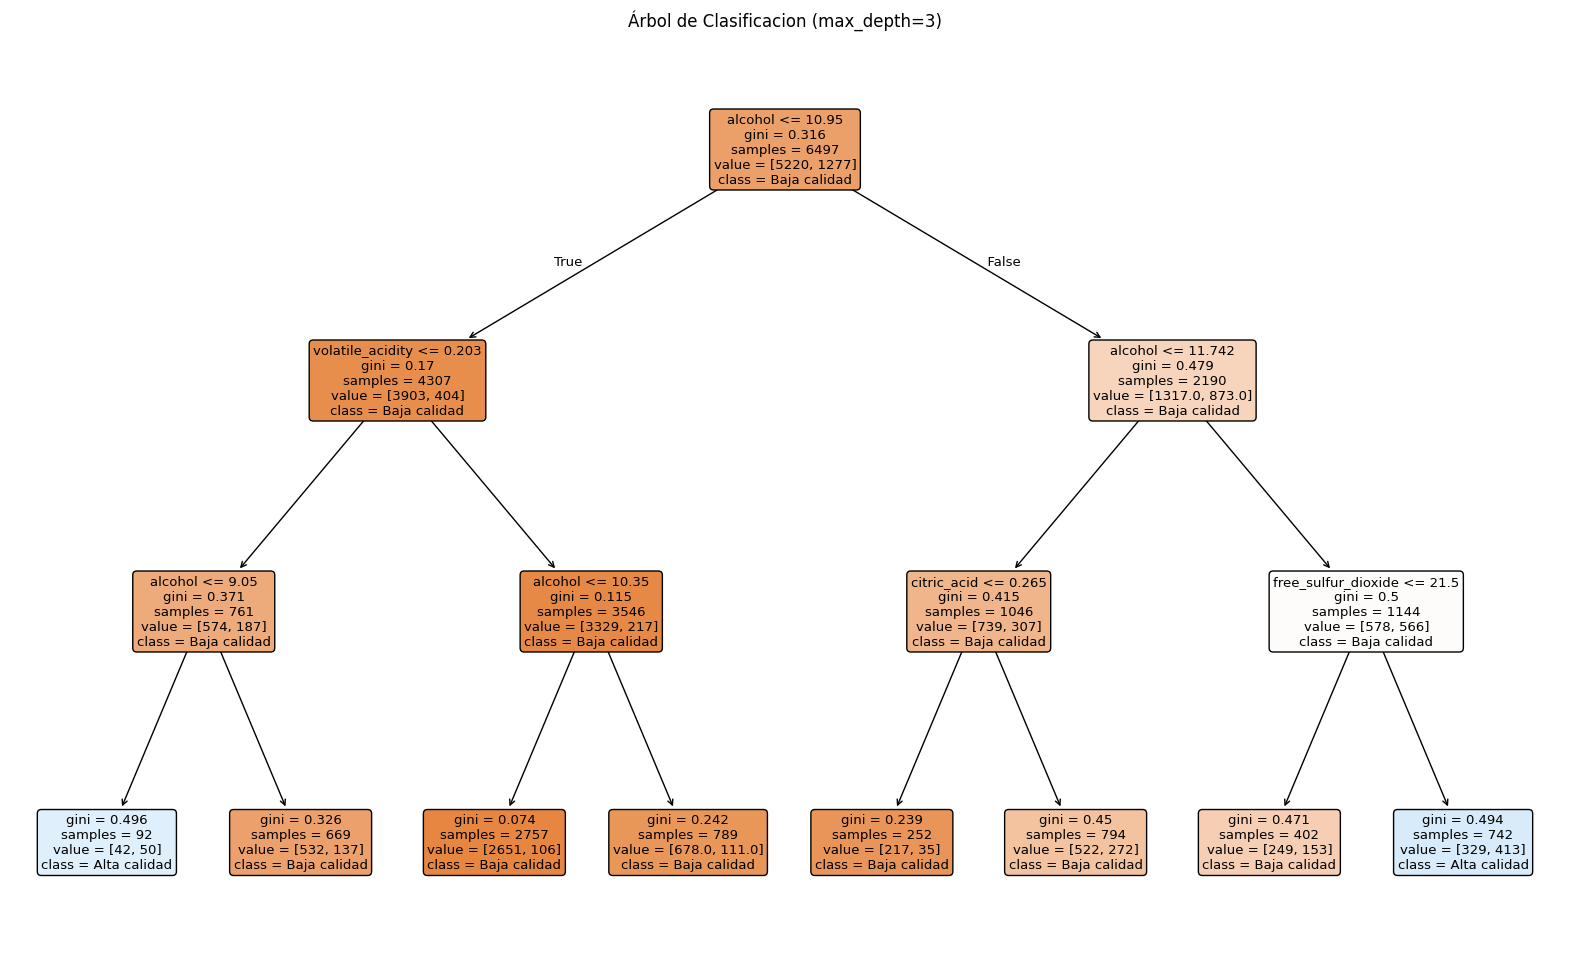

In [34]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
# entrenamiento del modelo
tree.fit(X, y)

# Predecir y evaluar el error del modelo final
y_pred_tree = tree.predict(X_test)

class_names = ['Baja calidad', 'Alta calidad']
plt.figure(figsize=(20, 12))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.title("√Årbol de Clasificacion (max_depth=3)")
plt.show()


**Respuesta:**

**Interpretacion de una ruta:** Si el vino tiene un contenido de alcohol menor o igual a 10.95, su acidez vol√°til es menor o igual a 0.20, y el alcohol es adem√°s menor o igual a 10.35, entonces el vino tiene muy baja probabilidad de ser un vino de alta calidad.

**Caracteristicas que aprendio:** El √°rbol de decisi√≥n aprendi√≥ que los vinos de alta calidad suelen tener un contenido elevado de alcohol y un nivel moderado/alto de di√≥xido de azufre libre, lo que est√° asociado con mejor conservaci√≥n y sabor y que la volatilidad de la acidez debe ser baja. Estas caracter√≠sticas combinadas aumentan la probabilidad de que un vino sea considerado de calidad alta.

###**3.2 Sobreajuste (Overfitting):**

Explique el concepto de sobreajuste en el contexto de los √Årboles de Decisi√≥n. ¬øQu√© suceder√≠a con el rendimiento del modelo en los datos de entrenamiento vs. los de prueba si no se controla la profundidad del √°rbol?

**Respuesta:** El sobreajuste en √°rboles de decisi√≥n ocurre cuando el modelo se vuelve excesivamente complejo, aprende patrones irrelevantes y ruido del conjunto de entrenamiento. Si no se controla la profundidad del √°rbol, el rendimiento ser√° muy alto en entrenamiento pero bajo en los datos de prueba, porque el modelo no podr√° generalizar correctamente

###**3.3 Importancia de Caracter√≠sticas:**

Los √°rboles de decisi√≥n pueden calcular la importancia de cada caracter√≠stica. Extraiga y visualice la importancia de las caracter√≠sticas del modelo entrenado. ¬øCoinciden las caracter√≠sticas m√°s importantes con las que ten√≠an mayor correlaci√≥n en el EDA?

**Respuesta:** Si coinciden las caracteristicas con el EDA, ya que el alcohol se comporta como el principal indicador de calidad, mientras que una baja acidez vol√°til contribuye a una mejor percepci√≥n del vino. Adem√°s, niveles adecuados de di√≥xido de azufre apoyan la preservaci√≥n y se asocian con vinos de alta calidad.

El feature de acidez volatil es una relacion inversa, donde entre mas bajo es mejor el vino

##**4. Modelado con Naive Bayes**

###**4.1 El Supuesto ‚ÄùNaive‚Äù (Ingenuo):**
El algoritmo Naive Bayes se basa en un supuesto fundamental sobre las caracter√≠sticas. ¬øCu√°l es este supuesto y por qu√© se considera ‚Äùingenuo‚Äù?, ¬øcree que este supuesto se cumple para las variables fisicoqu√≠micas del vino?, Justifique.

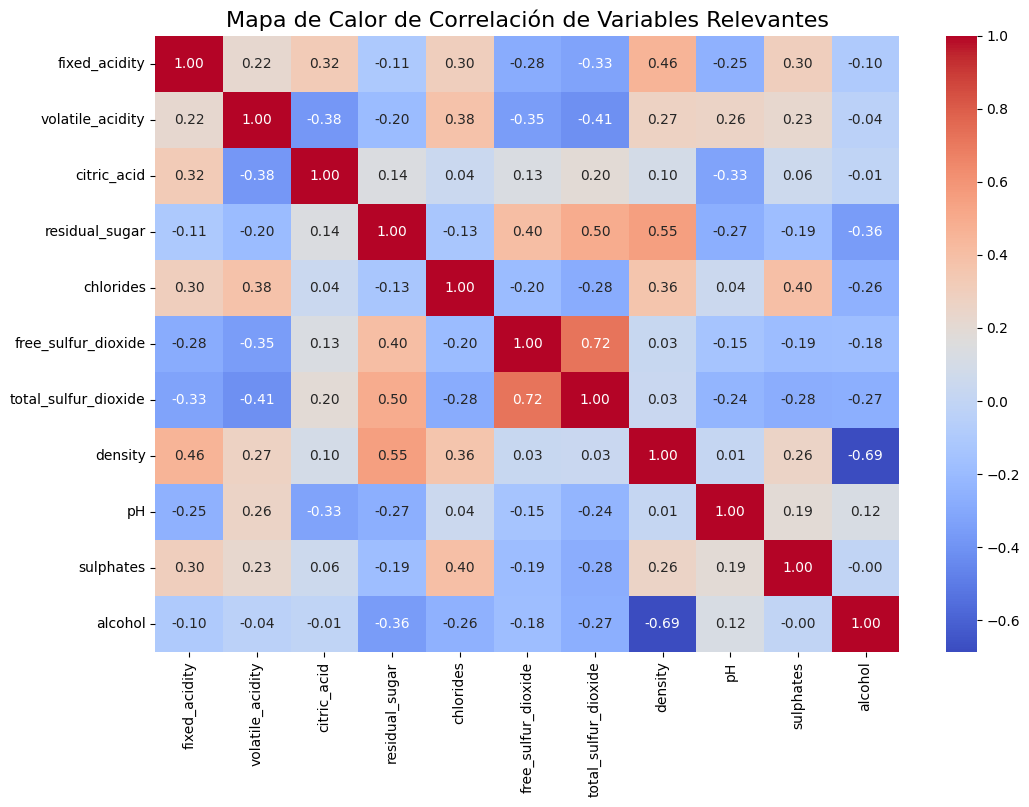

In [22]:
correlation_matrix = X.corr() #X no tiene la variable objetivo ni la codificada

plt.figure(figsize=(12, 8))
sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f"
    )
plt.title('Mapa de Calor de Correlaci√≥n de Variables Relevantes', fontsize=16)
plt.show()

**Respuesta:** El supuesto fundamental es que las caracter√≠sticas son independientes entre s√≠, dada la clase. Es ingenuo porque rara vez se cumple esta condici√≥n en la vida real, lo usual es que en un dataset las variables est√©n correlacionadas. Este supuesto es entonces una simplificaci√≥n matem√°tica para que funcione, pero no es realista.

En vista de la matriz de correlaciones de las variables fisicoqu√≠micas del vino, hay al menos una relaci√≥n lineal detectada entre alcohol y densidad. Esta es de -0.69, lo que indica que cuando una aumenta, la otra decrese.  

###**4.2 Probabilidades a Posteriori:**
Explique, en t√©rminos conceptuales, c√≥mo el clasificador Naive Bayes utiliza las
distribuciones de las caracter√≠sticas (aprendidas de los datos de entrenamiento) y el Teorema de Bayes para calcular la probabilidad de que un nuevo vino sea de "alta calidad".

In [20]:
# Entrenamiento de Naive Bayes:
# 1. Probabilidades a priori
print("\n--- Probabilidades a priori ---")
print(df_wine['alta_calidad'].value_counts(normalize=True))

# 2. Estad√≠sticas descriptivas de las caracter√≠sticas num√©ricas
print("\n--- Distribuciones de las caracter√≠sticas ---")
display(X.describe().T)


--- Probabilidades a priori ---
alta_calidad
0    0.803448
1    0.196552
Name: proportion, dtype: float64

--- Distribuciones de las caracter√≠sticas ---


count        mean        std      min       25%  \
fixed_acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile_acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric_acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual_sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free_sulfur_dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total_sulfur_dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   

                            50%        75%        max  
fixed_acidity           7.00000    7.70000   15.90000  
volatile_acidity        0.29000    0.40000    1.58000  
citric_acid             0.31000    0.39000    1.66000  
residual_sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free_sulfur_dioxide    29.00000   41.00000  289.00000  
total_sulfur_dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000

**Respuesta:**

***Entrenamiento***

El clasificador revisa los datos de entrenamiento y ajusta sus *probabilidades a priori* seg√∫n la distribuci√≥n de clases de la variable objetivo. Para este caso ellas ser√≠an:

*    P(calidad est√°ndar) = 0.80
*    P(alta calidad) = 0.20

Esto equivale a asumir que, sin ver sus caracter√≠sticas, el 20% de los vinos son de alta calidad.

Luego, revisa las distribuciones de las caracter√≠sticas para cada una de las clases de la variable objetivo. Esto le permite aprender la media y la desviaci√≥n est√°ndar de cada variable cuando la clase es '0' (calidad est√°ndar) y cuando es '1' (alta calidad).

Adem√°s de las *probabilidades a priori*, el modelo ahora puede describir las caracter√≠sticas de un vino est√°ndar o de alta calidad.

***Predicci√≥n***

Cuando ve un vino que no conoce, para saber si es de alta calidad o no, el clasificador usa el Teorema de Bayes. En principio, calcula 2 probabilidades:

1.   La probabilidad de que el vino sea de alta calidad, dadas sus caracter√≠sticas: Usa las distribuciones aprendidas en el entrenamiento para las caracter√≠sticas del vino cuando la clase es '1' y eval√∫a qu√© tan probable es que cada caracter√≠stica del nuevo vino corresponda con ellas. A final, multiplica todas las probabilidades de las caracter√≠sticas y las pondera por la probabilidad previa de cada clase (la probabilidad de 20%).

2.   La probabilidad de que el vino sea de calidad est√°ndar, dadas sus caracter√≠sticas: Hace el mismo proceso pero ahora con las distribuciones aprendidas para la clase '0'.

Finalmente, el clasificador elige la clase con mayor *probabilidad posterior* entre las dos. Esto equivale a responderse una pregunta como ¬øen qu√© grupo de vinos encajar√≠a mejor el vino nuevo, considerando todas sus caracter√≠sticas?.


###**4.3 Manejo de Datos Continuos:**
El modelo est√°ndar de Naive Bayes funciona con caracter√≠sticas categ√≥ricas. Dado que nuestras variables son continuas, se utiliza com√∫nmente la variante Gaussian Naive Bayes. ¬øQu√© asume este modelo sobre la distribuci√≥n de los datos de cada clase?

**Respuesta:** Gaussian Naive Bayes asume que las distribuciones de las caracter√≠sticas difieren entre las clases. Puntualmente en el caso de los vinos, la media y la desviaci√≥n est√°ndar de sus variables f√≠sicoqu√≠micas deber√≠an diferir entre los datos que corresponden a los vinos de 'calidad est√°ndar' y los de 'alta calidad'.

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Instanciar el modelo
# Creamos una instancia del clasificador Naive Bayes Gaussiano
gnb_model = GaussianNB()

# 2. Entrenar el modelo
# Usamos el m√©todo .fit() con nuestros datos de entrenamiento escalados
gnb_model.fit(X_train_scaled, y_train)

# 3. Realizar predicciones
# Usamos el modelo entrenado para predecir las etiquetas del conjunto de prueba
y_pred_naive = gnb_model.predict(X_test_scaled)

# 4. Primera evaluaci√≥n: Exactitud (Accuracy)
# Comparamos las predicciones (y_pred) con las etiquetas reales (y_test)
accuracy = accuracy_score(y_test, y_pred_naive)

print("--- Predicciones del Modelo ---")
print(f"Primeras 10 predicciones: {y_pred_naive[:10]}")
print(f"Primeras 10 etiquetas reales: {y_test[:10]}")

print(f"\nLa exactitud (Accuracy) del modelo en el conjunto de prueba es: {accuracy:.4f}")
print(f"Esto significa que el {accuracy:.2%} de las predicciones fueron correctas.")

--- Predicciones del Modelo ---
Primeras 10 predicciones: [0 0 1 0 0 0 0 0 0 1]
Primeras 10 etiquetas reales: 3103    1
1419    0
4761    1
4690    0
4032    0
1297    0
1773    0
5584    0
561     0
5946    1
Name: alta_calidad, dtype: int64

La exactitud (Accuracy) del modelo en el conjunto de prueba es: 0.7608
Esto significa que el 76.08% de las predicciones fueron correctas.


##**5. Evaluaci√≥n comparativa y conclusiones:**

###**5.1 M√©tricas de Rendimiento:**
Debido al desbalance de clases, la exactitud (accuracy) no es la mejor m√©trica. Compare ambos modelos utilizando la Precisi√≥n, el Recall y el F1-Score para la clase minoritaria (‚Äùalta calidad‚Äù). ¬øQu√© modelo es mejor para identificar correctamente los vinos buenos?

In [36]:
# Generar reportes de Clasificaci√≥n
report_tree = classification_report(y_test, y_pred_tree)
report_naive = classification_report(y_test, y_pred_naive)

print("--- M√âTRICAS PARA √ÅRBOL DE DECISI√ìN ---")
print(report_tree)
print("\n--- M√âTRICAS PARA NAIVE ---")
print(report_naive)

--- M√âTRICAS PARA √ÅRBOL DE DECISI√ìN ---
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1048
           1       0.53      0.35      0.42       252

    accuracy                           0.81      1300
   macro avg       0.69      0.64      0.66      1300
weighted avg       0.79      0.81      0.80      1300


--- M√âTRICAS PARA NAIVE ---
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1048
           1       0.42      0.64      0.51       252

    accuracy                           0.76      1300
   macro avg       0.66      0.72      0.68      1300
weighted avg       0.81      0.76      0.78      1300



###**5.2 An√°lisis de Errores:**
Compare las matrices de confusi√≥n de ambos modelos. En el contexto de una bodega, ¬øqu√© error es m√°s costoso: un Falso Positivo (etiquetar un vino est√°ndar como de alta calidad) o un Falso Negativo (etiquetar un vino de
alta calidad como est√°ndar)? Justifique su elecci√≥n y determine qu√© modelo es preferible seg√∫n este criterio.

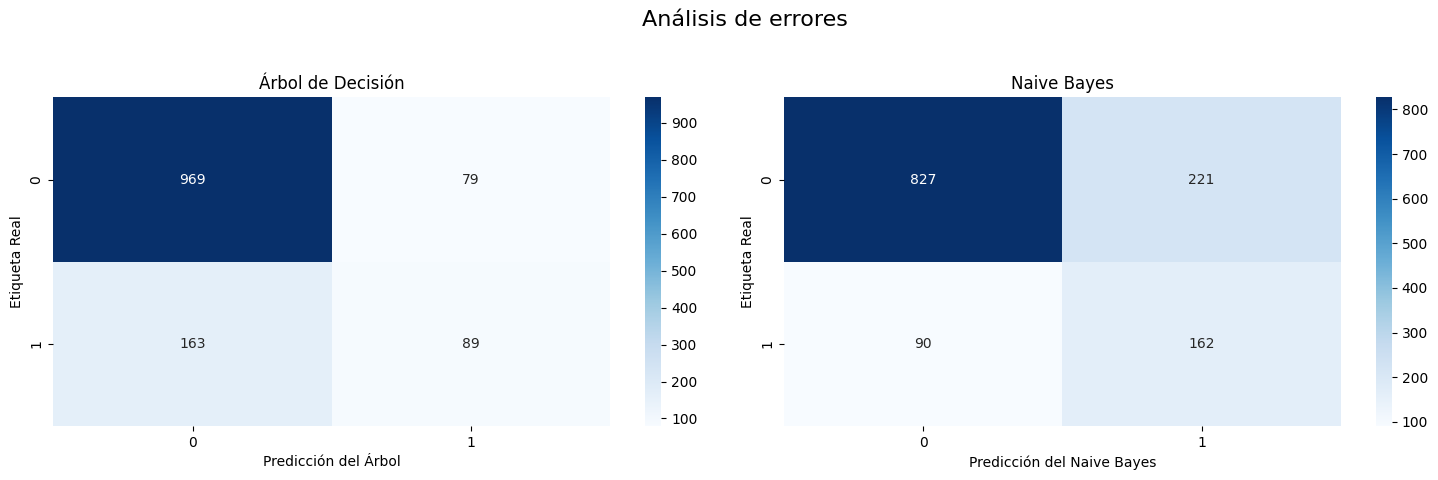


--- üîç COMPARACI√ìN DE MODELOS --- 

M√©trica                    Naive Bayes        √Årbol   Diferencia
-----------------------------------------------------------------
TN (Correctos negativos)           827          969         +142
FP (Falsas alarmas)                221           79         -142


In [39]:
# 1. Calcular las matrices de confusi√≥n
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_naive = confusion_matrix(y_test, y_pred_naive)

# 2. Visualizar la Matriz de Confusi√≥n
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('An√°lisis de errores', fontsize=16)

# Matriz del √Årbol
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel('Predicci√≥n del √Årbol')
axes[0].set_ylabel('Etiqueta Real')
axes[0].set_title('√Årbol de Decisi√≥n')

# Matriz del Naive Bayes
sns.heatmap(cm_naive, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_xlabel('Predicci√≥n del Naive Bayes')
axes[1].set_ylabel('Etiqueta Real')
axes[1].set_title('Naive Bayes')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Explicaci√≥n manual de los valores ---
tn_nb, fp_nb, fn_nb, tp_nb = cm_naive.ravel()
tn_tr, fp_tr, fn_tr, tp_tr = cm_tree.ravel()

print("\n--- üîç COMPARACI√ìN DE MODELOS --- \n")
print(f"{'M√©trica':<25} {'Naive Bayes':>12} {'√Årbol':>12} {'Diferencia':>12}")
print("-" * 65)
print(f"{'TN (Correctos negativos)':<25} {tn_nb:>12} {tn_tr:>12} {tn_tr-tn_nb:>+12}")
print(f"{'FP (Falsas alarmas)':<25} {fp_nb:>12} {fp_tr:>12} {fp_tr-fp_nb:>+12}")


###**5.3 Curva ROC y AUC:**
Genere las curvas ROC para ambos modelos en el mismo gr√°fico y compare sus valores de AUC.
¬øQu√© nos dice el √°rea bajo la curva sobre la capacidad general de cada modelo para discriminar entre las dos clases?

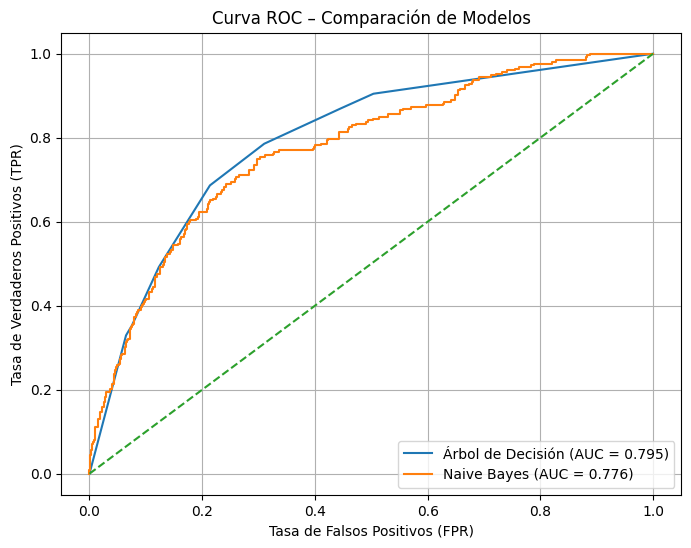


--- AUC Scores ---
AUC √Årbol de Decisi√≥n: 0.7951
AUC Naive Bayes: 0.7756


In [40]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Obtener probabilidades para la clase positiva (1)
y_prob_tree = tree.predict_proba(X_test)[:, 1]
y_prob_naive = gnb_model.predict_proba(X_test_scaled)[:, 1]

# ROC Curves
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_naive, tpr_naive, _ = roc_curve(y_test, y_prob_naive)

# AUC
auc_tree = auc(fpr_tree, tpr_tree)
auc_naive = auc(fpr_naive, tpr_naive)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f"√Årbol de Decisi√≥n (AUC = {auc_tree:.3f})")
plt.plot(fpr_naive, tpr_naive, label=f"Naive Bayes (AUC = {auc_naive:.3f})")

# L√≠nea base
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title("Curva ROC ‚Äì Comparaci√≥n de Modelos")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\n--- AUC Scores ---")
print(f"AUC √Årbol de Decisi√≥n: {auc_tree:.4f}")
print(f"AUC Naive Bayes: {auc_naive:.4f}")


###**5.4 Recomendaci√≥n Final:**
Bas√°ndose en una evaluaci√≥n integral que considere el rendimiento (F1-Score, AUC), la interpretabilidad, la robustez a los supuestos del modelo y la simplicidad, ¬øqu√© modelo (√Årbol de Decisi√≥n o Naive Bayes) recomendar√≠a a la bodega para su sistema de control de calidad? Justifique su elecci√≥n.